# 0) Kütüphaneler

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# 1) Veriyi Yükleme ve İşleme

In [ ]:
path = "archive/Train" # Train dosyasının yolu
imageDimensions = (32, 32) # Tüm resimleri 32x32 piksele eşitleyeceğiz
testRatio = 0.2 # Verinin %20'si test için ayrılacak

In [ ]:
images = [] # Resimlerin piksel verilerini tutacak liste
classNo = [] # Resimlerin hangi sınıfa ait olduğunu tutacak liste

In [ ]:
print("Veriler okunuyor, lütfen bekleyin...")
myList = os.listdir(path)
noOfClasses = len(myList) 

print(f"Toplam Sınıf Sayısı: {noOfClasses}")


for x in range(0, noOfClasses):
    myPicList = os.listdir(path + "/" + str(x))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(x) + "/" + y)
        
        # Eğitim hızlansın diye griye çeviriyoruz (Opsiyonel)
        # curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2GRAY) 
        
        curImg = cv2.resize(curImg, imageDimensions) # Resmi 32x32 yaptık
        images.append(curImg)
        classNo.append(x)
    print(f"Sınıf {x} yüklendi.")

Veriler okunuyor, lütfen bekleyin...
Toplam Sınıf Sayısı: 43
Sınıf 0 yüklendi.
Sınıf 1 yüklendi.
Sınıf 2 yüklendi.
Sınıf 3 yüklendi.
Sınıf 4 yüklendi.
Sınıf 5 yüklendi.
Sınıf 6 yüklendi.
Sınıf 7 yüklendi.
Sınıf 8 yüklendi.
Sınıf 9 yüklendi.
Sınıf 10 yüklendi.
Sınıf 11 yüklendi.
Sınıf 12 yüklendi.
Sınıf 13 yüklendi.
Sınıf 14 yüklendi.
Sınıf 15 yüklendi.
Sınıf 16 yüklendi.
Sınıf 17 yüklendi.
Sınıf 18 yüklendi.
Sınıf 19 yüklendi.
Sınıf 20 yüklendi.
Sınıf 21 yüklendi.
Sınıf 22 yüklendi.
Sınıf 23 yüklendi.
Sınıf 24 yüklendi.
Sınıf 25 yüklendi.
Sınıf 26 yüklendi.
Sınıf 27 yüklendi.
Sınıf 28 yüklendi.
Sınıf 29 yüklendi.
Sınıf 30 yüklendi.
Sınıf 31 yüklendi.
Sınıf 32 yüklendi.
Sınıf 33 yüklendi.
Sınıf 34 yüklendi.
Sınıf 35 yüklendi.
Sınıf 36 yüklendi.
Sınıf 37 yüklendi.
Sınıf 38 yüklendi.
Sınıf 39 yüklendi.
Sınıf 40 yüklendi.
Sınıf 41 yüklendi.
Sınıf 42 yüklendi.


In [ ]:
# NumPy dizisine çevirme
images = np.array(images)
classNo = np.array(classNo)

In [ ]:
# veriyi ayırdım
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)

In [ ]:
# Şu an pikseller 0-255 arasında. Bunu 255'e bölerek 0-1 arasına çekiyoruz.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Model "2" sayısının "1" sayısından büyük olduğunu sanmasın diye kategorik hale getiriyoruz (ONE HOT ENCODING).
y_train = tf.keras.utils.to_categorical(y_train, noOfClasses)
y_test = tf.keras.utils.to_categorical(y_test, noOfClasses)

print("Veri Hazırlığı Tamamlandı!")
print(f"Eğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu: {X_test.shape}")

Veri Hazırlığı Tamamlandı!
Eğitim Seti Boyutu: (31367, 32, 32, 3)
Test Seti Boyutu: (7842, 32, 32, 3)


# 2) Modeli Kurma

In [ ]:
# Modeli Başlatıyoruz
model = Sequential()

# İlk Konvolüsyon Bloğu (Gözler - Özellik Çıkarıcı)
# 32 tane filtre gezdiriyoruz.
# (5,5) filtrenin boyutu.
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

# Resimdeki gereksiz detayları atıp önemli kısımları (2,2) penceresiyle küçültüyoruz.
model.add(MaxPool2D(pool_size=(2, 2)))

# MOdel ezber yapmasın diye nöronların %25 kapatıyoruz.
model.add(Dropout(rate=0.25))

# İkinci Konvolüsyon Bloğu (Daha Derin Özellikler)
# Filtre sayısını 64'e çıkardık, daha karmaşık şekilleri (üçgen, yuvarlak levha farkı vb.) öğrenecek.
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# 2 Boyutlu matrisleri, tek boyutlu uzun bir vektöre çeviriyoruz.
# Çünkü Dense katmanlar sadece düz vektör anlar.
model.add(Flatten())

# Tam Bağlantılı Katman
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

# Çıkış Katmanı
# 43 Nöron = 43 Farklı Trafik İşareti
# Softmax = Olasılık dağılımı verir
model.add(Dense(43, activation='softmax'))

model.summary()

c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,939 (1.36 MB)

 Trainable params: 356,939 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

# 3) Modeli Eğitme ve Sonuçlar

In [ ]:
# Optimizer: 'Adam' öğrenme hızını otomatik ayarlar.
# Loss: 43 farklı sınıf olduğu için 'categorical_crossentropy' kullanıyoruz.
# Metrics: Başarıyı 'accuracy' (doğruluk yüzdesi) olarak takip edeceğiz.
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# batch_size=32: Resimleri 32'şerli paketler halinde modele sokar.
# epochs=10: Tüm veri setinin üzerinden 10 kere geçer.
# validation_data: Her tur sonunda test verisiyle kendini dener.
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6349 - loss: 1.2848 - val_accuracy: 0.9631 - val_loss: 0.1321
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9339 - loss: 0.2160 - val_accuracy: 0.9862 - val_loss: 0.0603
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9588 - loss: 0.1326 - val_accuracy: 0.9897 - val_loss: 0.0412
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9699 - loss: 0.1019 - val_accuracy: 0.9921 - val_loss: 0.0302
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9736 - loss: 0.0884 - val_accuracy: 0.9926 - val_loss: 0.0271
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9789 - loss: 0.0689 - val_accuracy: 0.9938 - val_loss: 0.0235
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9784 - loss: 0.0712 - val_accuracy: 0.9935 - val_loss: 0.0231
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9811 - loss: 0.0589 - val_accuracy

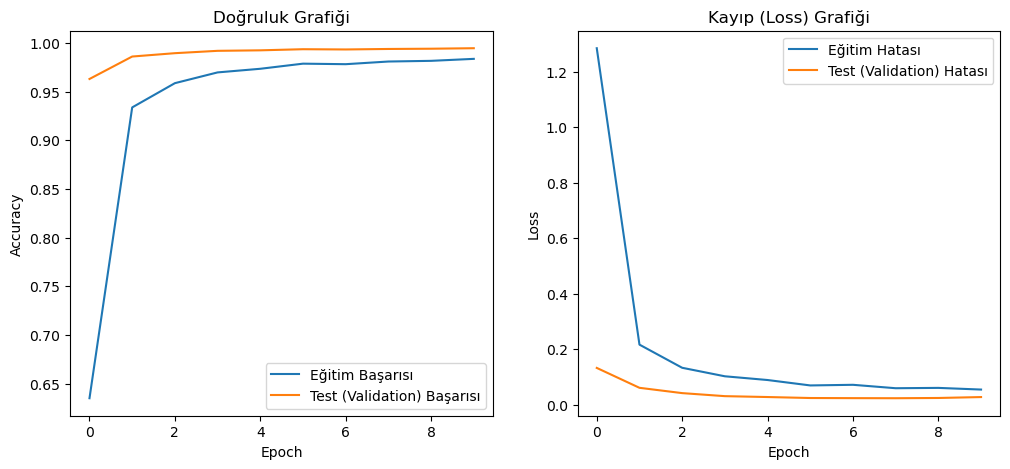

In [ ]:
# Grafik boyutu
plt.figure(figsize=(12, 5))

# 1. Grafik: Doğruluk (Accuracy)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Başarısı')
plt.plot(history.history['val_accuracy'], label='Test (Validation) Başarısı')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 2. Grafik: Kayıp (Loss) - Hata Oranı
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Hatası')
plt.plot(history.history['val_loss'], label='Test (Validation) Hatası')
plt.title('Kayıp (Loss) Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 4) Modeli Kaydetme

In [15]:
model.save("my_traffic_model.h5")
print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!
